# Credit Card Fraud Detection — EDA & Modeling

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

BASE = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
data_kaggle = BASE / "data" / "creditcard.csv"
data_sample = BASE / "data" / "creditcard_sample.csv"

if data_kaggle.exists():
    print(f"Using Kaggle dataset: {data_kaggle}")
    df = pd.read_csv(data_kaggle)
else:
    print(f"Using sample dataset: {data_sample}")
    df = pd.read_csv(data_sample)

df.head()


Using Kaggle dataset: c:\Users\LAKSHAY JAIN\Downloads\CreditCard_Fraud_Detection\data\creditcard.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:

# Class balance
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

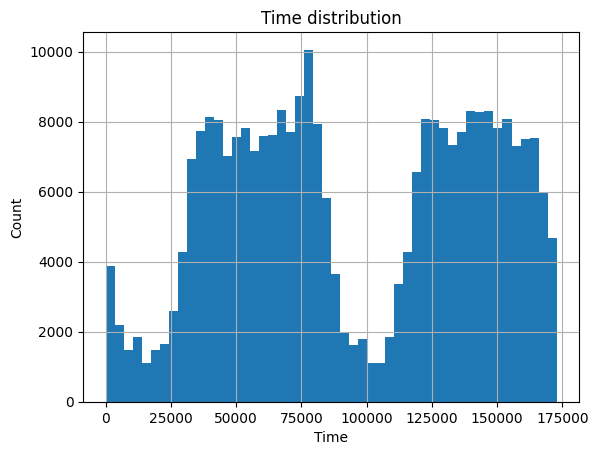

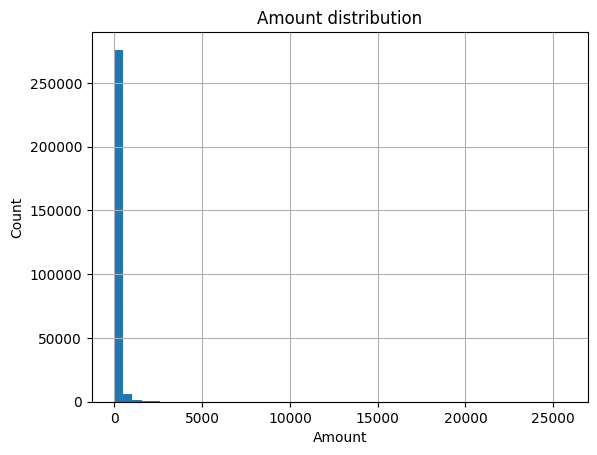

In [7]:

# Basic histograms for Time and Amount
plt.figure()
df['Time'].hist(bins=50)
plt.title('Time distribution')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

plt.figure()
df['Amount'].hist(bins=50)
plt.title('Amount distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X = df.drop(columns=['Class'])
y = df['Class']
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))
print('ROC-AUC:', roc_auc_score(y_test, y_prob))


[[56851    13]
 [   35    63]]
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8289    0.6429    0.7241        98

    accuracy                         0.9992     56962
   macro avg     0.9142    0.8213    0.8619     56962
weighted avg     0.9991    0.9992    0.9991     56962

ROC-AUC: 0.9572835078037969
